In [19]:
#Import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("creditcard_2023.csv")

In [10]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [11]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
data["Class"].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [15]:
data.drop(["id"],axis=1, inplace=True)

In [16]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


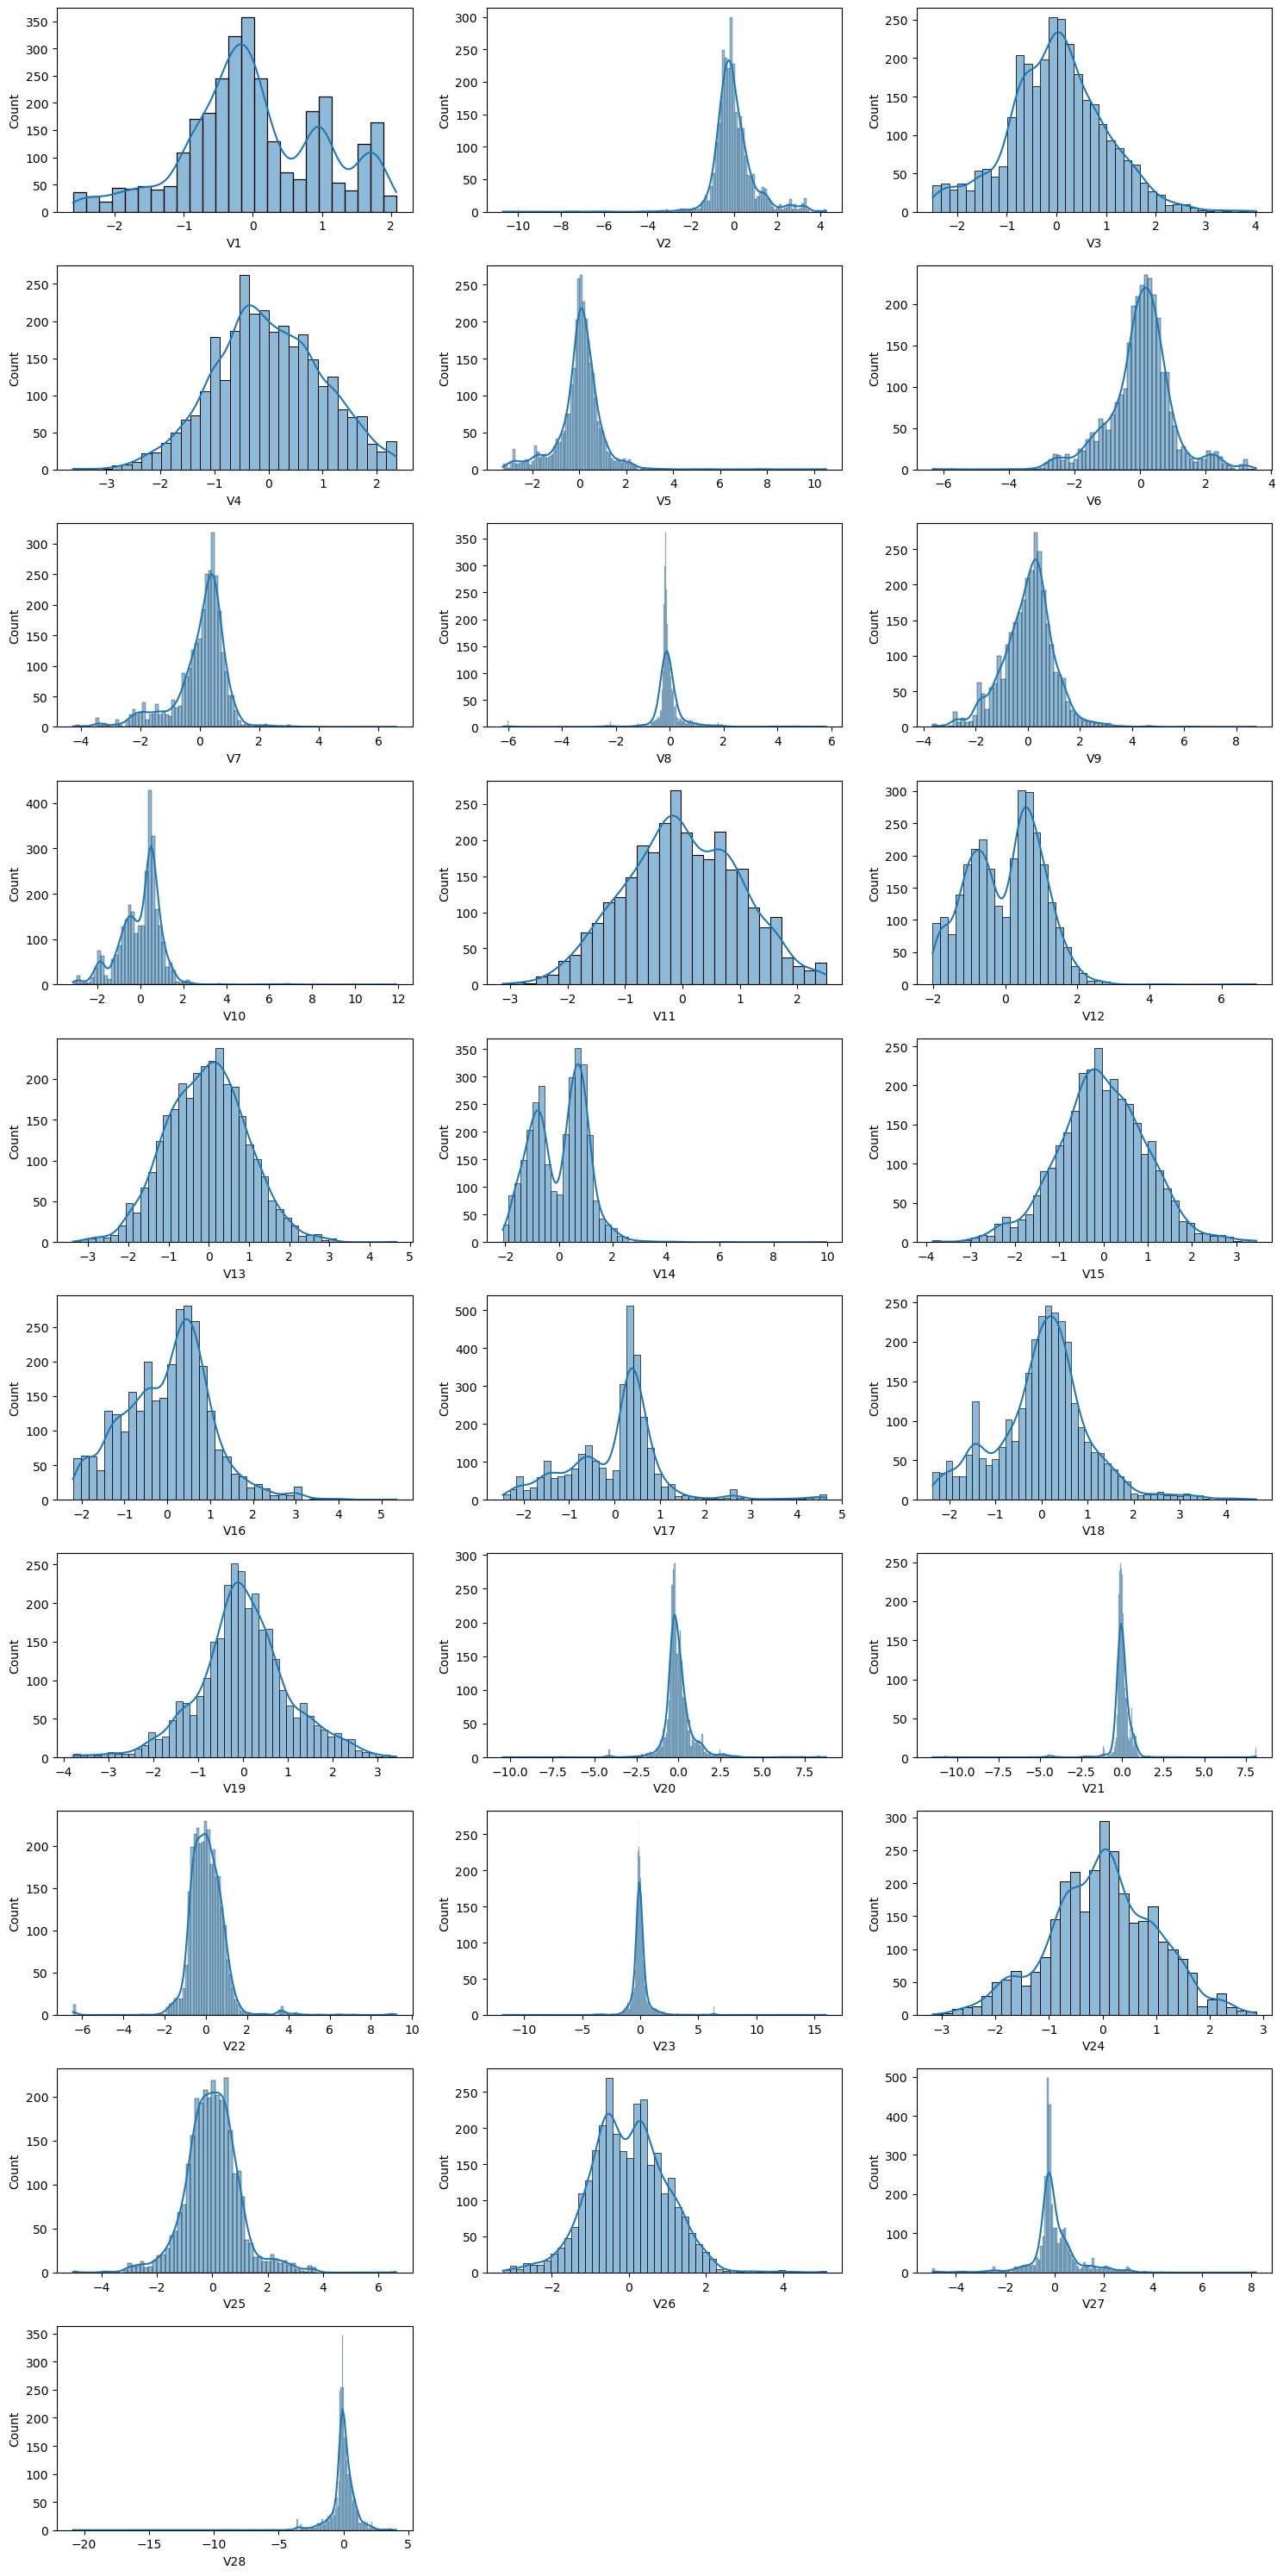

In [20]:
fig, axs = plt.subplots(nrows = 10, ncols = 3, figsize = (15, 30))
axs = axs.flat

df_temp = data.sample(3000)

for i in range(len(data.columns) -1):
    sns.histplot(
        df_temp[data.columns[i]],
        ax=axs[i],
        kde = True,
    )
    
fig.delaxes(axs[28])
fig.delaxes(axs[29])
fig.tight_layout()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Split data into train and test set
#First seperate input data from output data (Class)
X=data.drop(["Class"],axis=1) #drop the output variable
y=data["Class"]

In [24]:
#normalize the input features
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)

In [27]:
#Now split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size = 0.33 , random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [32]:
clf.score(X_train,y_train)

0.9648224850517872

In [33]:
y_pred=clf.predict(X_test)

In [34]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [35]:
#Create confusion matrix
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(y_test,y_pred)

array([[91738,  2037],
       [ 4437, 89436]])

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9654992326057299

In [42]:
#Now, I ll try a different scaler while processing the data
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax,y, test_size = 0.33 , random_state=42)

In [44]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/Users/nassi/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
clf.score(X_train,y_train)

0.9616071100471938

In [46]:
y_pred=clf.predict(X_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[92210,  1565],
       [ 5531, 88342]])

In [48]:
accuracy_score(y_test, y_pred)

0.9621845156889495